In [88]:
print("Group Details")
print("1. Pranav Gupta 22102060")
print("2. Shivam Mittal 22102025")
print("3. Kartik Kumar 22102005")


Group Details
1. Pranav Gupta 22102060
2. Shivam Mittal 22102025
3. Kartik Kumar 22102005


In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
data = pd.read_csv("flipkart_data.csv")
data

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [91]:
print(data.head())

                                              review  rating
0  It was nice produt. I like it's design a lot. ...       5
1  awesome sound....very pretty to see this nd th...       5
2  awesome sound quality. pros 7-8 hrs of battery...       4
3  I think it is such a good product not only as ...       5
4  awesome bass sound quality very good bettary l...       5


In [92]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [93]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
# Function for cleaning and preprocessing text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text


In [96]:
data['cleaned_review'] = data['review'].apply(preprocess_text)

In [97]:
data

,review,rating,cleaned_review
0,It was nice produt. I like it's design a lot. ...,5,nice produt like design lot easy carry looked ...
1,awesome sound....very pretty to see this nd th...,5,awesome soundvery pretty see nd sound quality ...
2,awesome sound quality. pros 7-8 hrs of battery...,4,awesome sound quality pro hr battery life incl...
3,I think it is such a good product not only as ...,5,think good product per quality also design qui...
4,awesome bass sound quality very good bettary l...,5,awesome bass sound quality good bettary long l...
...,...,...,...
9971,GoodREAD MORE,5,goodread
9972,Everything is amazimg but the built is very li...,5,everything amazimg built lightread
9973,GoodREAD MORE,5,goodread
9974,Best headphone i have ever used....READ MORE,5,best headphone ever usedread


In [95]:
data.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [98]:
ratings = data['rating'].value_counts()

In [99]:
ratings

rating
5    5726
4    2365
3     884
1     691
2     310
Name: count, dtype: int64

In [100]:
data.review.describe()

count              9976
unique             7694
top       GoodREAD MORE
freq                264
Name: review, dtype: object

In [101]:
# Ensure the 'cleaned_review' column exists and is properly cleaned
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Define features (X) and target variable (y)
X = data['cleaned_review']  # Features: cleaned reviews
y = data['rating']  # Target variable: ratings

# Display the shape of X and y to ensure they have the same number of samples
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (9976,)
Shape of y: (9976,)


In [102]:
# Split the data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
print("Train set - X shape:", X_train.shape)
print("Train set - y shape:", y_train.shape)
print("Test set - X shape:", X_test.shape)
print("Test set - y shape:", y_test.shape)


Train set - X shape: (7980,)
Train set - y shape: (7980,)
Test set - X shape: (1996,)
Test set - y shape: (1996,)


In [103]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Display the shape of the vectorized data
print("Shape of vectorized train data:", X_train_vectorized.shape)
print("Shape of vectorized test data:", X_test_vectorized.shape)


Shape of vectorized train data: (7980, 7494)
Shape of vectorized test data: (1996, 7494)


In [105]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_vectorized, y_train)


LogisticRegression(max_iter=1000)

In [104]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

# Preprocess the text data
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Initialize CountVectorizer to convert text into a term-document matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['cleaned_review'])

# Initialize TfidfTransformer and fit it on the term-document matrix
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)

# Now X_tfidf contains the TF-IDF weighted document-term matrix
print(X_tfidf)

  (0, 7292)	0.41767186502252557
  (0, 6000)	0.4680698395608404
  (0, 5005)	0.15609742734322185
  (0, 4430)	0.30336397630204237
  (0, 4391)	0.4418220734985761
  (0, 4320)	0.21318378103839902
  (0, 2449)	0.2950479919950813
  (0, 2076)	0.22764660605597997
  (0, 1308)	0.3324670894443398
  (1, 8410)	0.3824863371358602
  (1, 7467)	0.3098307095347259
  (1, 7099)	0.45752903828848235
  (1, 7056)	0.12349782797914981
  (1, 6736)	0.34968132047089473
  (1, 6317)	0.16824105531620404
  (1, 6126)	0.1319254585804334
  (1, 5891)	0.2580762671585871
  (1, 5789)	0.3034720885435758
  (1, 4963)	0.3098307095347259
  (1, 4450)	0.2584004928194214
  (1, 3179)	0.11132826115252316
  (1, 440)	0.176860568109875
  (2, 8417)	0.11594995532789425
  (2, 8236)	0.18918595596870477
  (2, 7839)	0.1338889202728224
  :	:
  (9964, 5891)	0.27418434900891725
  (9964, 5827)	0.5795820752408312
  (9964, 3179)	0.2365538462445452
  (9965, 3532)	0.9309308911019429
  (9965, 3179)	0.36519539426468994
  (9966, 5966)	0.6900757945859729
  (

In [106]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)


In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.655310621242485
Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.56      0.62       141
           2       0.43      0.10      0.16        59
           3       0.36      0.24      0.28       156
           4       0.44      0.26      0.33       468
           5       0.72      0.91      0.80      1172

    accuracy                           0.66      1996
   macro avg       0.53      0.41      0.44      1996
weighted avg       0.61      0.66      0.62      1996

Confusion Matrix:
[[  79    3   18    9   32]
 [  17    6   10    9   17]
 [   7    3   37   46   63]
 [   8    2   26  122  310]
 [   4    0   13   91 1064]]


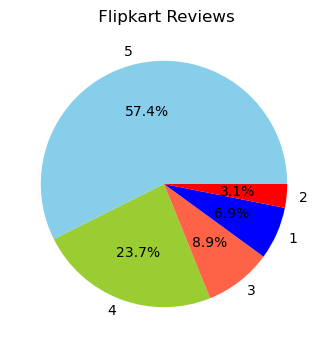

In [108]:
# Get the ratings and their counts
ratings_count = data['rating'].value_counts()

# Extract ratings and their counts
ratings = ratings_count.index
counts = ratings_count.values

# Define custom colors
custom_colors = ["skyblue", "yellowgreen", 'tomato', "blue", "red"]
central_circle = plt.Circle((0, 0), 0.5, color='white')
# Create the pie chart
plt.figure(figsize=(4,4))
plt.pie(counts, labels=ratings, colors=custom_colors, autopct='%1.1f%%')
plt.title(" Flipkart Reviews")
plt.show()

In [109]:
print(data.columns)

Index(['review', 'rating', 'cleaned_review'], dtype='object')


In [110]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]

In [111]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z=sum(data["Neutral"])

In [112]:
def sentiment_score(x,y,z):
    if(x>y) and (x>z):
        print("Positive")
    elif(y>x) and (y>z):
        print ("Negative")
    else:
        print("Neutral")

In [113]:
print(data.dtypes)

review             object
rating              int64
cleaned_review     object
Positive          float64
Negative          float64
Neutral           float64
dtype: object


In [114]:
sentiment_score(x,y,z)

Neutral


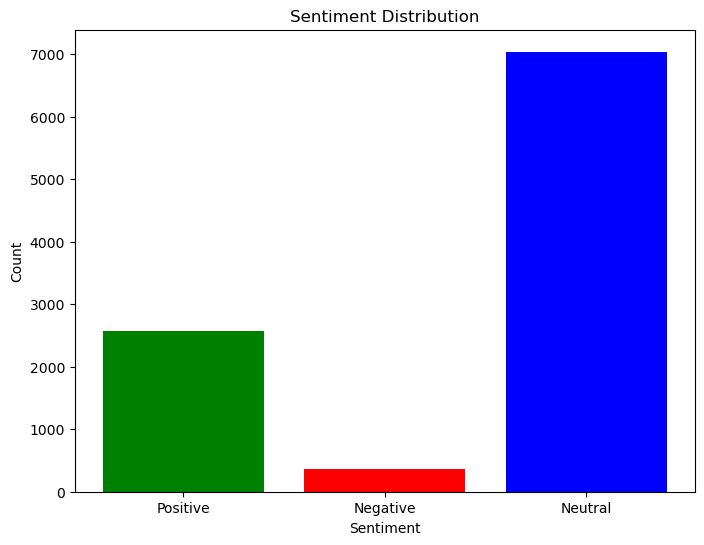

In [115]:
sentiments = ['Positive', 'Negative', 'Neutral']

plt.figure(figsize=(8, 6))
plt.bar(sentiments, [x, y, z], color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
